
# Module -5
# MODERN PORTFOLIO THEORY

 ## 5.1 Get mean expected annual returns and volatility of the stock.

In [164]:
# importing librabies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')

In [30]:

# importing the dataset
info = pd.read_csv('INFY.csv',index_col ='Date' )

# data preprocessing 
info = info[info['Series']== 'EQ']
info.index = pd.to_datetime(info.index)
info['Daily Returns'] = info['Close Price'].pct_change()*100
info['Daily Returns'][0] = (info['Close Price'][0]/info['Prev Close'][0]-1)*100
info

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Daily Returns
Date,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.50,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,-1.317086
2017-05-16,INFY,EQ,951.55,953.10,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,0.362566
2017-05-17,INFY,EQ,955.00,951.60,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,-0.230366
2017-05-18,INFY,EQ,952.80,943.00,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,0.939337
2017-05-19,INFY,EQ,961.75,961.50,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,-0.395113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,INFY,EQ,718.40,720.40,727.90,718.70,724.40,724.55,724.51,5747536,4.164127e+09,104342,3690425,64.21,0.856069
2019-05-08,INFY,EQ,724.55,721.00,726.00,716.50,718.95,719.35,721.65,6247642,4.508603e+09,162077,3950857,63.24,-0.717687
2019-05-09,INFY,EQ,719.35,719.15,730.30,715.80,722.00,721.05,724.48,7396525,5.358635e+09,242225,4808832,65.01,0.236324


### daily and annual mean returns 

In [37]:
daily_mean_returns = round (info['Daily Returns'].mean(),2)
daily_mean_returns

-0.01

In [36]:
expected_annual_returns = round (daily_mean_returns*252,2)
expected_annual_returns

-3.03

### Daily and annual standard deviation of returns

In [39]:
daily_std = info['Daily Returns'].std()
daily_std

2.637389334728736

In [40]:
annual_std = daily_std*np.sqrt(252)
annual_std

41.86725774087793

## 5.2 Bulding portfolio of 5 stocks of equal weightage and finding net annual return and volatility

In [99]:
# importing 5 stocks
reli = pd.read_csv('Large_Cap\RELIANCE.csv')
voltas = pd.read_csv('Mid_Cap\VOLTAS.csv')
apollo = pd.read_csv('Mid_Cap\APOLLOTYRE.csv')
raymond = pd.read_csv('Small_Cap\RAYMOND.csv')
ashok = pd.read_csv('Small_Cap\ASHOKA.csv')

In [100]:
# checking the shape of datasets 
stocks = [reli,voltas,apollo,raymond,ashok]
for i in stocks:
    print (i.shape)      

(495, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)


In [101]:
# Creating function for preprocessing dataset for data_preprocessing(stock):
def data_preprocessing(stock):
    stock = stock[stock['Series']== 'EQ']
    stock.index = stock.Date
    stock = stock.drop('Date',axis=1)
    stock.index = pd.to_datetime(stock.index)
    stock ['Daily Returns'] = stock['Close Price'].pct_change()*100
    stock ['Daily Returns'][0] = (stock['Close Price'][0] / stock['Prev Close'][0]-1)*100
    return stock

In [102]:
# calling function
reli = data_preprocessing(reli)
voltas = data_preprocessing(voltas)
apollo = data_preprocessing(apollo)
raymond = data_preprocessing(raymond)
ashok = data_preprocessing(ashok)

In [103]:
# checking shape
stocks = [reli,voltas,apollo,raymond,ashok]
for i in stocks:
    print (i.shape)      

(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)


In [104]:
# creating new dataframe with each stock returns 
returns_df = pd.DataFrame()
for i in stocks:
    returns_df[i.Symbol[0]] = i['Daily Returns']
returns_df

,RELIANCE,VOLTAS,APOLLOTYRE,RAYMOND,ASHOKA
Date,,,,,
2017-05-15,-0.470214,-0.392112,2.136093,1.224704,2.709769
2017-05-16,0.907671,0.138937,1.078051,1.578675,-0.532284
2017-05-17,-0.235936,-0.520291,1.258532,-0.171975,0.977199
2017-05-18,-1.903037,-3.742445,-1.980198,-4.683213,-3.387097
2017-05-19,-0.640374,0.398454,0.859660,-3.192985,-1.621751
...,...,...,...,...,...
2019-05-07,-2.989386,-0.759013,-0.938848,0.359779,1.766480
2019-05-08,-3.278750,-4.123369,-1.767418,-0.228692,-2.243861
2019-05-09,-3.309092,-0.442209,-3.363755,-0.223021,-0.129926


### covariance 


In [105]:
np.cov(returns_df.RELIANCE, returns_df.VOLTAS,)[0,1]

0.5860672750904361

In [106]:
np.cov(returns_df.RELIANCE, returns_df.APOLLOTYRE,)[0,1]

0.866102767481354

In [107]:
np.cov(returns_df.RELIANCE, returns_df.RAYMOND,)[0,1]

0.503226328154184

In [108]:
np.cov(returns_df.RELIANCE, returns_df.ASHOKA,)[0,1]

0.39156949475746666

In [109]:
np.cov(returns_df.ASHOKA, returns_df.VOLTAS,)[0,1]

0.9591547492798038

In [110]:
np.cov(returns_df.RAYMOND, returns_df.VOLTAS,)[0,1]

1.3623608070235529

In [111]:
np.cov(returns_df.APOLLOTYRE, returns_df.VOLTAS,)[0,1]

1.2617221670271592

In [112]:
np.cov(returns_df.APOLLOTYRE, returns_df.RAYMOND,)[0,1]

1.6756998679963155

In [113]:
np.cov(returns_df.APOLLOTYRE, returns_df.ASHOKA,)[0,1]

1.2022402928890166

In [114]:
np.cov(returns_df.ASHOKA, returns_df.RAYMOND,)[0,1]

1.3887102718128896

### Annual mean returns and volatility of portfolio

In [212]:
# annual portfolio returns  
weights = np.asarray([.2,.2,.2,.2,.2])
mean_daily_returns = returns_df.mean()
annual_mean_returns = mean_daily_returns*252
net_annual_returns_porto = sum(annual_mean_returns*weights)
net_annual_returns_porto

2.0394535533830465

In [213]:
# annual portofolio volatility
returns_std = returns_df.std()
annual_returns_std = returns_std*np.sqrt(252)
net_annual_volatility = sum(annual_returns_std*weights)
net_annual_volatility

37.2781533882397

## 5.3 Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio

In [214]:
# setting number of runs of portfolio for varing weights
n = 25000

# creating empty list to seperate different values during itration
net_annual_returns = []
net_annual_volatility = []
reli =[]
volt =[]
apo  =[]
ray = []
ash = []
sharpe_ratio = []

# perfroming itration with differnt weights 
for i in range(n):
    weight = np.random.rand(5)
    weight /= sum(weight)
    reli.append(weight[0])
    volt.append(weight[1])
    apo.append(weight[2])
    ray.append(weight[3])
    ash.append(weight[4])
    net_annual_returns.append(sum(annual_mean_returns*weight))
    net_annual_volatility.append(sum(annual_returns_std*weight))
    sharpe_ratio.append(net_annual_returns[i]/net_annual_volatility[i])
    

In [215]:
# creating new dataframe with the new set of list
df = pd.DataFrame(net_annual_returns,columns=['Net Returns'])
df['Net Vol'] = net_annual_volatility
df['Sharpe'] = sharpe_ratio
df['Reli'] = reli
df['Volt'] = volt
df['Apo'] = apo
df['Ray'] = ray
df['Ash'] = ash
df

,Net Returns,Net Vol,Sharpe,Reli,Volt,Apo,Ray,Ash
0,-7.463303,38.159410,-0.195582,0.005402,0.140443,0.258209,0.103341,0.492605
1,-0.877969,38.438991,-0.022841,0.263152,0.071496,0.252255,0.181670,0.231427
2,1.109653,38.621643,0.028731,0.204353,0.128204,0.103878,0.312914,0.250652
3,-2.872696,39.246269,-0.073197,0.309279,0.024554,0.278914,0.112876,0.274377
4,1.972923,38.084723,0.051804,0.294358,0.272962,0.176148,0.009288,0.247244
...,...,...,...,...,...,...,...,...
24995,5.430843,37.519078,0.144749,0.304398,0.218515,0.148752,0.218203,0.110132
24996,7.683474,35.415007,0.216955,0.230469,0.421088,0.194044,0.067313,0.087085
24997,7.940643,37.940363,0.209293,0.330011,0.218679,0.043370,0.339313,0.068628
24998,3.094930,35.650222,0.086814,0.115894,0.296531,0.249090,0.163524,0.174961


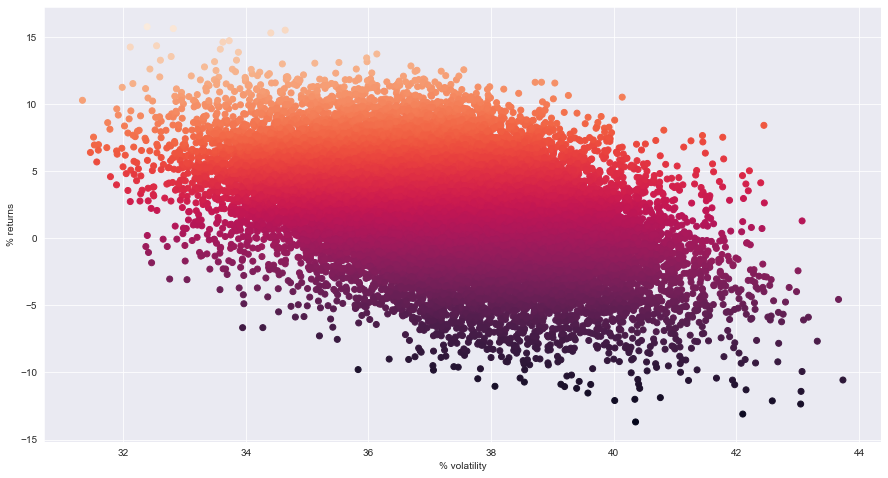

In [245]:
# ploting
sns.set_style('darkgrid')
fig,ax = plt.subplots(figsize=(15,8))
ax.scatter(df['Net Vol'],df['Net Returns'],c= df['Sharpe'])
ax.set(xlabel = '% volatility', ylabel ='% returns');

# 5.4 Mark portfolio with - 1. The sharpe ratio highest  2. The volatility lowest

In [226]:
# finding x and y coordinates for the highest sharpe and lowest vol portfolio
vol_min = df['Net Vol'][df['Net Vol']== df['Net Vol'].min()].values
ret_vol_min = df['Net Returns'][df['Net Vol']== df['Net Vol'].min()].values
sharpe_max = df['Net Vol'][df['Sharpe']== df['Sharpe'].max()].values
ret_sharpe_max = df['Net Returns'][df['Sharpe']== df['Sharpe'].max()].values 
sharpe_max, ret_vol_min, vol_min, ret_sharpe_max

(array([32.3910564]),
 array([10.2690722]),
 array([31.33657952]),
 array([15.74549746]))

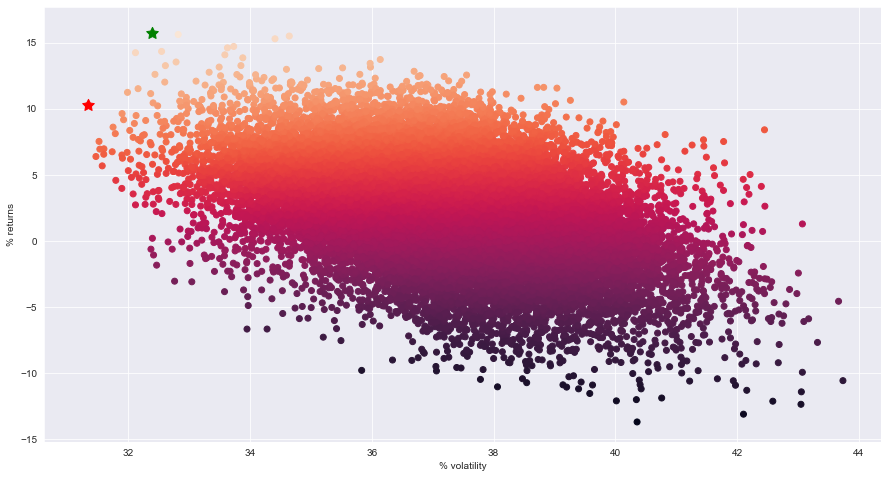

In [227]:
# ploting the graph and highlighting the required portfolio's
sns.set_style('darkgrid')
fig,ax = plt.subplots(figsize=(15,8))
ax.scatter(df['Net Vol'],df['Net Returns'],c= df['Sharpe'])
ax.scatter(vol_min,ret_vol_min,marker =(5,1,0), c='r', s =150)
ax.scatter(sharpe_max,ret_sharpe_max,marker =(5,1,0), c='g', s =150)
ax.set(xlabel = '% volatility', ylabel ='% returns');

In [234]:
portfo1 = df[df['Sharpe']==df['Sharpe'].max()]
portfo2 = df[df['Net Vol']== df['Net Vol'].min()]

In [243]:
print(f'''The weightage of portfolio 1 with highest sharpe is - 
      RELIANCE:{portfo1.Reli.values[0]},
      VOLTAS:{portfo1.Volt.values[0]},
      APOLLOTYRE:{portfo1.Apo.values[0]},
      RAYMOND:{portfo1.Ray.values[0]},
      ASHOKA:{portfo1.Ash.values[0]}''' )

The weightage of portfolio 1 with highest sharpe is - 
      RELIANCE:0.019744600758956652,
      VOLTAS:0.7497639851357668,
      APOLLOTYRE:0.0050391493241199745,
      RAYMOND:0.216019614373796,
      ASHOKA:0.009432650407360582


In [244]:
print(f'''The weightage of portfolio 2 with lowest Volatility is - 
      RELIANCE:{portfo2.Reli.values[0]},
      VOLTAS:{portfo2.Volt.values[0]},
      APOLLOTYRE:{portfo2.Apo.values[0]},
      RAYMOND:{portfo2.Ray.values[0]},
      ASHOKA:{portfo2.Ash.values[0]}''' )

The weightage of portfolio 2 with lowest Volatility is - 
      RELIANCE:0.005939600686626607,
      VOLTAS:0.6276962375614022,
      APOLLOTYRE:0.31581000466185655,
      RAYMOND:0.038546566752812976,
      ASHOKA:0.012007590337301352
